In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# définition de l'équation différentielle
alpha = 2 # variable globale pour définir l'exposant dans la force
def F(t, Y):
    K = 0.1
    res = np.array(Y)
    
    # dx/dt, dy/dt, dz/dt
    for i in range(3):
        res[i] = Y[i+3]
        
    # vecteur r
    pos = np.array(Y[0:3])
    
    # norme du vecteur position
    r = np.sqrt(np.sum([pos[i]**2 for i in range(3)]))
    for i in range(3):
        res[3+i] = -K/r**alpha*pos[i]/r
    return res

alpha= 1.6


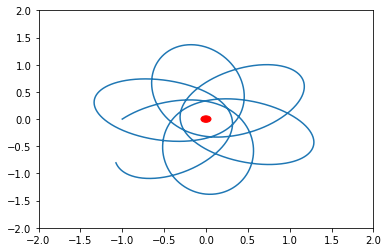

alpha= 1.9


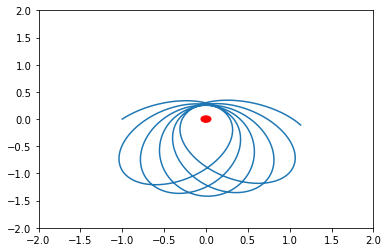

alpha= 2


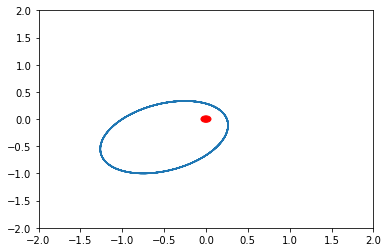

alpha= 2.1


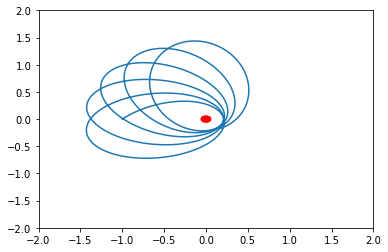

alpha= 2.5


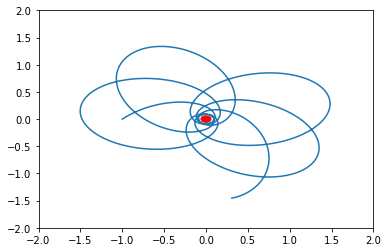

In [3]:
Y0 = np.array([-1, 0, 0, 0.2, 0.2, 0])
tlims = [0, 80]
teval = np.linspace(0, 80, 2000)


# Détermine la trajectoire pour plusieurs valeurs de l'exposant.
for alpha in [1.6, 1.9, 2, 2.1, 2.5]:
    #Résolution de l'équation différentielle
    sol = solve_ivp(F, tlims, Y0, t_eval=teval, method='Radau')
    ax = plt.gca()
    
    # centre de force
    cercle = plt.Circle((0,0), 0.06, color='r')
    ax.add_patch(cercle)
    
    # Trace la solution
    plt.plot(sol.y[0,:], sol.y[1,:])
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    print("alpha=",alpha)
    plt.show()